In [28]:
#Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
#Loading dataset
data=pd.read_csv('indian_liver_patient.csv')
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [ ]:
data.shape

(583, 11)

In [30]:
#Checking for null values
data.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [31]:
#Filling missing data with mean
data['Albumin_and_Globulin_Ratio']=data['Albumin_and_Globulin_Ratio'].fillna(data['Albumin_and_Globulin_Ratio'].mean())

In [32]:
#Checking for null values
data.isna().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


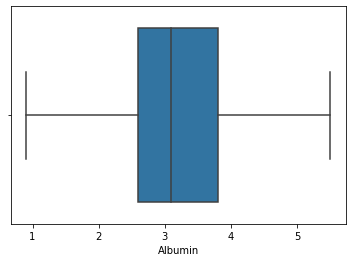

In [6]:
#Handling outliers
sns.boxplot(data['Albumin'])

In [7]:
Q1 = data['Albumin'].quantile(0.25)
Q3 = data['Albumin'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
data['Albumin']=np.where(data['Albumin']>upper_whisker,upper_whisker,np.where(data['Albumin']<lower_whisker,lower_whisker,data['Albumin']))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


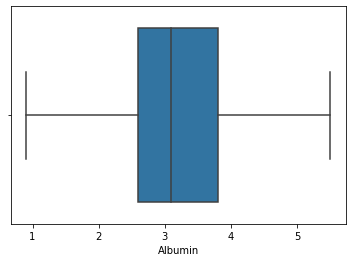

In [8]:
sns.boxplot(data['Albumin'])

In [33]:
#Handling categorical data
numeric_data = data.select_dtypes(include=[np.number]) 
categorical_data = data.select_dtypes(exclude=[np.number]) 
print("Number of numerical variables: ", numeric_data.shape[1]) 
print("Number of categorical variables: ", categorical_data.shape[1])

Number of numerical variables:  10
Number of categorical variables:  1


In [34]:
print("Number of categorical variables: ", categorical_data.shape[1]) 
Categorical_variables = list(categorical_data.columns)
Categorical_variables

Number of categorical variables:  1


['Gender']

In [11]:
data['Gender'].value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

In [12]:
#Encoding 'Gender' Column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(data['Gender'])
data["Gender"] = label

In [35]:
data['Gender'].value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

In [13]:
numeric_data = data.select_dtypes(include=[np.number]) 
categorical_data = data.select_dtypes(exclude=[np.number]) 
print("Number of numerical variables: ", numeric_data.shape[1]) 
print("Number of categorical variables: ", categorical_data.shape[1])

Number of numerical variables:  11
Number of categorical variables:  0


In [36]:
# Replacing infinite with nan
data.replace([np.inf, -np.inf], np.nan, inplace=True)
# Dropping all the rows with nan values
data.dropna(inplace=True)

In [40]:
#Defining X and Y for independent and dependent variables
Feature = data[['Age','Total_Bilirubin',	'Direct_Bilirubin',	'Alkaline_Phosphotase',	'Alamine_Aminotransferase',	'Aspartate_Aminotransferase',	'Total_Protiens',	'Albumin',	'Albumin_and_Globulin_Ratio']]
X = Feature                    
Y = data['Dataset']

In [38]:
X[:5]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40


In [ ]:
Y[:5]

0    1
1    1
2    1
3    1
4    1
Name: Dataset, dtype: int64

In [41]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
object= StandardScaler()
scale = object.fit_transform(X) 
print(scale)

[[ 1.25209764 -0.41887783 -0.49396398 ...  0.29211961  0.19896867
  -0.14789798]
 [ 1.06663704  1.22517135  1.43042334 ...  0.93756634  0.07315659
  -0.65069686]
 [ 1.06663704  0.6449187   0.93150811 ...  0.47653296  0.19896867
  -0.17932291]
 ...
 [ 0.44843504 -0.4027597  -0.45832717 ... -0.0767071   0.07315659
   0.16635131]
 [-0.84978917 -0.32216906 -0.35141677 ...  0.29211961  0.32478075
   0.16635131]
 [-0.41704777 -0.37052344 -0.42269037 ...  0.75315299  1.58290153
   1.73759779]]


In [42]:
X_scaled  = pd.DataFrame(scale, columns = X.columns)
X_scaled

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,1.252098,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.147898
1,1.066637,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.650697
2,1.066637,0.644919,0.931508,0.821588,-0.113522,-0.145186,0.476533,0.198969,-0.179323
3,0.819356,-0.370523,-0.387054,-0.447314,-0.365626,-0.311465,0.292120,0.324781,0.166351
4,1.684839,0.096902,0.183135,-0.393756,-0.294379,-0.176363,0.753153,-0.933340,-1.719144
...,...,...,...,...,...,...,...,...,...
578,0.942997,-0.451114,-0.493964,0.862786,-0.332743,-0.262967,-0.537740,-1.939837,-1.813419
579,-0.293407,-0.434996,-0.493964,-0.793378,-0.250535,-0.273359,-0.445534,0.073157,0.480601
580,0.448435,-0.402760,-0.458327,-0.187766,-0.179288,-0.211005,-0.076707,0.073157,0.166351
581,-0.849789,-0.322169,-0.351417,-0.439074,-0.283418,-0.269895,0.292120,0.324781,0.166351


In [43]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.20, random_state=0)

In [ ]:
X_train.shape

(466, 10)

In [ ]:
X_test.shape

(117, 10)

In [ ]:
Y_train.shape

(466,)

In [ ]:
Y_test.shape

(117,)

K-Nearest neighbours

In [45]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn= KNN()   
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [46]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [47]:
from sklearn.model_selection import GridSearchCV
n_neighbors = [x for x in range(5, 86, 2)]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
weights = ['uniform', 'distance']

grid = {'n_neighbors': n_neighbors,
        'algorithm': algorithm,
        'weights': weights}

In [49]:
new_model = KNN() 
knn_grid = GridSearchCV(estimator = new_model, param_grid = grid, cv = 7, verbose=0)
knn_grid.fit(X_train, Y_train)

GridSearchCV(cv=7, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [5, 7, 9, 11, 13, 15, 17, 19, 21, 23,
                                         25, 27, 29, 31, 33, 35, 37, 39, 41, 43,
                                         45, 47, 49, 51, 53, 55, 57, 59, 61, 63, ...],
                         'weights': ['uniform', 'distance']})

In [50]:
knn_grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 41, 'weights': 'distance'}

In [53]:
Y_pred = knn_grid.best_estimator_.predict(X_test)

pred_df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})
pred_df.head()

,Actual,Predicted
246,1,1
92,1,1
386,2,1
186,1,1
389,1,1


In [55]:
from sklearn import metrics
# Measure the Accuracy Score
print("Accuracy score of the predictions: {value:.2f} %".format(value=metrics.accuracy_score(Y_pred, Y_test)*100))

Accuracy score of the predictions: 67.52 %


Polynomial regression

In [57]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X, Y)

LinearRegression()

In [60]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, Y)
lin2 = LinearRegression()
lin2.fit(X_poly, Y)

LinearRegression()

In [61]:
y_pred = lin.predict(X_test)
pred_df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
pred_df.head()

,Actual,Predicted
246,1,1.585750
92,1,1.607519
386,2,1.725271
186,1,1.615975
389,1,1.672439


K-Means Clustering

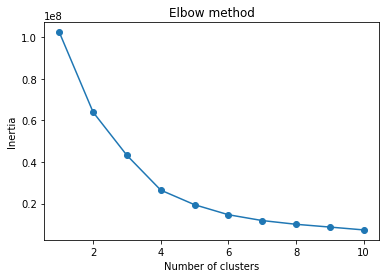

In [66]:
from sklearn.cluster import KMeans
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [67]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
pred_df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
pred_df.head()

,Actual,Predicted
246,1,1.585750
92,1,1.607519
386,2,1.725271
186,1,1.615975
389,1,1.672439


Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 0)
logreg.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [69]:
from sklearn import metrics
# Measure the Accuracy Score
print("Accuracy score of the predictions: {value:.2f} %".format(value=metrics.accuracy_score(Y_pred, Y_test)*100))

Accuracy score of the predictions: 67.52 %


Naive Bayes

In [71]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB()

In [72]:
y_pred = gnb.predict(X_test)
y_pred

array([1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2,
       2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2,
       1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2])

In [77]:
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score: 0.6068


Random Forest Classifier

In [83]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [84]:
y_pred = rfc.predict(X_test)

In [86]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.6752


Decision tree Classifier

In [90]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [91]:
y_pred_gini = clf_gini.predict(X_test)

In [92]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(Y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.6667
